# TRAIN ALL FILLS, VALIDATION ALL FILLS, ALL DETECTORS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as pl
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
# Data loading and pre-processing:
data_dir = '/afs/cern.ch/user/m/mrapelli/private/mnt/stablebeamfills/train'
merged_data = []

for filename in sorted(os.listdir(data_dir), reverse=True):
    if not filename.startswith("bcm1f_fills"): continue
    #if not filename.startswith("bcm1f_fills_7634"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset["name"] = filename
    print (dataset.shape)
    dataset = dataset.set_index('dt')
    dataset = dataset.reset_index()
    dataset['Datetime'] = pd.to_datetime(dataset['dt']).values.astype(int)
    dataset.set_index('Datetime', inplace=True)
    dataset.drop(columns=['dt'], inplace = True)
    merged_data.append(dataset)
    

dataset_train = pd.concat(merged_data) 

bcm1f_fills_8078.csv
(5998, 51)
bcm1f_fills_8076.csv
(6137, 51)
bcm1f_fills_8073.csv
(6296, 51)
bcm1f_fills_8072.csv
(6284, 51)
bcm1f_fills_8068.csv
(5060, 51)
bcm1f_fills_8063.csv
(5485, 51)
bcm1f_fills_8062.csv
(6728, 51)
bcm1f_fills_8059.csv
(5526, 51)
bcm1f_fills_8058.csv
(4986, 51)
bcm1f_fills_8057.csv
(5516, 51)
bcm1f_fills_8046.csv
(5659, 51)
bcm1f_fills_8043.csv
(5851, 51)
bcm1f_fills_8033.csv
(5463, 51)
bcm1f_fills_8030.csv
(4928, 51)
bcm1f_fills_8023.csv
(6643, 51)
bcm1f_fills_8022.csv
(5590, 51)
bcm1f_fills_8018.csv
(5825, 51)
bcm1f_fills_7978.csv
(6409, 51)
bcm1f_fills_7967.csv
(5679, 51)
bcm1f_fills_7966.csv
(6401, 51)
bcm1f_fills_7965.csv
(5995, 51)
bcm1f_fills_7923.csv
(44180, 51)
bcm1f_fills_7921.csv
(39653, 51)


In [3]:
# Data loading and pre-processing:
data_dir = '/afs/cern.ch/user/m/mrapelli/private/mnt/stablebeamfills/test'
merged_data = []

for filename in sorted(os.listdir(data_dir), reverse=True):
    if not filename.startswith("bcm1f_fills"): continue
    #if not filename.startswith("bcm1f_fills_7634"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset["name"] = filename
    print (dataset.shape)
    dataset = dataset.set_index('dt')
    dataset = dataset.reset_index()
    dataset['Datetime'] = pd.to_datetime(dataset['dt']).values.astype(int)
    dataset.set_index('Datetime', inplace=True)
    dataset.drop(columns=['dt'], inplace = True)
    merged_data.append(dataset)
    

dataset_test = pd.concat(merged_data) 

bcm1f_fills_8151.csv
(54208, 50)
bcm1f_fills_8067_sampled.csv
(25668, 50)
bcm1f_fills_8067.csv
(6060, 51)
bcm1f_fills_8057.csv
(5516, 51)
bcm1f_fills_8027.csv
(5843, 51)
bcm1f_fills_8020.csv
(5441, 51)
bcm1f_fills_8019.csv
(5907, 51)
bcm1f_fills_8017.csv
(6480, 51)
bcm1f_fills_8016.csv
(5790, 51)
bcm1f_fills_8007.csv
(6478, 51)
bcm1f_fills_7969.csv
(6136, 51)
bcm1f_fills_7963.csv
(5866, 51)
bcm1f_fills_7960.csv
(7155, 51)


In [4]:
"""ch1_8 = [str(c) for c in range(9,49)]
dataset_train = dataset_train.drop(columns=ch1_8)
dataset_train.head()
np.shape(dataset_train)"""

'ch1_8 = [str(c) for c in range(9,49)]\ndataset_train = dataset_train.drop(columns=ch1_8)\ndataset_train.head()\nnp.shape(dataset_train)'

In [5]:
"""ch1_8 = [str(c) for c in range(9,49)]
dataset_test = dataset_test.drop(columns=ch1_8)
dataset_test.head()
np.shape(dataset_test)"""

'ch1_8 = [str(c) for c in range(9,49)]\ndataset_test = dataset_test.drop(columns=ch1_8)\ndataset_test.head()\nnp.shape(dataset_test)'

In [6]:
#dataset_train.plot()

In [7]:
#dataset_test.plot()

In [8]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
#dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
#dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,mean,name
Datetime,,,,,,,,,,,,,,,,,,,,,
1659358807000000000,31.000000,60.000000,37.000000,38.000000,20.000000,19.000000,29.000000,40.000000,46.000000,35.0,...,30.0,23.000000,4.000000,0.000000,36.000000,43.000000,33.000000,43.000000,30.437500,bcm1f_fills_8078.csv
1659358808000000000,30.800000,61.733333,36.466667,37.266667,20.733333,19.200000,30.133333,39.933333,45.133333,34.2,...,30.0,22.733333,3.933333,0.066667,35.866667,42.600000,32.666667,42.133333,30.476389,bcm1f_fills_8078.csv
1659358809000000000,30.600000,63.466667,35.933333,36.533333,21.466667,19.400000,31.266667,39.866667,44.266667,33.4,...,30.0,22.466667,3.866667,0.133333,35.733333,42.200000,32.333333,41.266667,30.515278,bcm1f_fills_8078.csv
1659358810000000000,30.400000,65.200000,35.400000,35.800000,22.200000,19.600000,32.400000,39.800000,43.400000,32.6,...,30.0,22.200000,3.800000,0.200000,35.600000,41.800000,32.000000,40.400000,30.554167,bcm1f_fills_8078.csv
1659358811000000000,30.200000,66.933333,34.866667,35.066667,22.933333,19.800000,33.533333,39.733333,42.533333,31.8,...,30.0,21.933333,3.733333,0.266667,35.466667,41.400000,31.666667,39.533333,30.593056,bcm1f_fills_8078.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657108852000000000,2.733333,0.266667,0.733333,0.266667,0.000000,1.266667,0.533333,0.733333,0.000000,0.0,...,0.0,0.733333,0.000000,0.000000,0.000000,0.266667,0.266667,0.266667,1.009722,bcm1f_fills_7921.csv
1657108853000000000,2.800000,0.200000,0.800000,0.200000,0.000000,1.200000,0.400000,0.800000,0.000000,0.0,...,0.0,0.800000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,1.012500,bcm1f_fills_7921.csv
1657108854000000000,2.866667,0.133333,0.866667,0.133333,0.000000,1.133333,0.266667,0.866667,0.000000,0.0,...,0.0,0.866667,0.000000,0.000000,0.000000,0.133333,0.133333,0.133333,1.015278,bcm1f_fills_7921.csv


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,name,mean
Datetime,,,,,,,,,,,,,,,,,,,,,
1659096129000000000,27.000000,51.000000,29.000000,17.000000,27.000000,28.000000,33.000000,33.000000,27.000000,37.000000,...,15.000000,16.000000,7.000000,0.000000,35.000000,27.000000,26.000000,35.000000,bcm1f_fills_8067.csv,28.333333
1659096130000000000,28.066667,50.400000,28.333333,17.666667,26.466667,27.600000,33.533333,34.066667,27.066667,36.533333,...,15.533333,16.066667,6.933333,0.066667,34.933333,26.866667,26.933333,34.333333,bcm1f_fills_8067.csv,28.386111
1659096131000000000,29.133333,49.800000,27.666667,18.333333,25.933333,27.200000,34.066667,35.133333,27.133333,36.066667,...,16.066667,16.133333,6.866667,0.133333,34.866667,26.733333,27.866667,33.666667,bcm1f_fills_8067.csv,28.438889
1659096132000000000,30.200000,49.200000,27.000000,19.000000,25.400000,26.800000,34.600000,36.200000,27.200000,35.600000,...,16.600000,16.200000,6.800000,0.200000,34.800000,26.600000,28.800000,33.000000,bcm1f_fills_8067.csv,28.491667
1659096133000000000,31.266667,48.600000,26.333333,19.666667,24.866667,26.400000,35.133333,37.266667,27.266667,35.133333,...,17.133333,16.266667,6.733333,0.266667,34.733333,26.466667,29.733333,32.333333,bcm1f_fills_8067.csv,28.544444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657454477000000000,53029.218274,55295.317259,52671.172589,56977.550761,55620.926396,63234.392132,59946.959391,67007.935279,57165.003807,68119.469543,...,53122.043147,59086.218274,12072.524112,3458.925127,51794.300761,56945.459391,54913.686548,57261.780457,bcm1f_fills_7960.csv,54426.362786
1657454478000000000,53108.233503,55377.664975,52749.649746,57062.426396,55703.781726,63328.593909,60036.258883,67107.756345,57250.131980,68220.944162,...,53201.162437,59174.233503,12090.502538,3464.071066,51871.426396,57030.258883,54995.467005,57347.055838,bcm1f_fills_7960.csv,54507.430732
1657454479000000000,53187.248731,55460.012690,52828.126904,57147.302030,55786.637056,63422.795685,60125.558376,67207.577411,57335.260152,68322.418782,...,53280.281726,59262.248731,12108.480964,3469.217005,51948.552030,57115.058376,55077.247462,57432.331218,bcm1f_fills_7960.csv,54588.498678


In [9]:
dataset_train = dataset_train.drop(columns=["name"])
dataset_test = dataset_test.drop(columns=["name"])
dataset_train = dataset_train.drop(columns=["mean"])
dataset_test = dataset_test.drop(columns=["mean"])

In [10]:
from sklearn import preprocessing

# Normalize data
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
#X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

In [11]:
#X_test.plot()

In [12]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Datetime,,,,,,,,,,,,,,,,,,,,,
1659358807000000000,0.000019,4.044299e-05,2.193105e-05,2.107117e-05,0.000011,9.288596e-06,1.535479e-05,1.913838e-05,0.000026,0.000017,...,0.000020,0.000020,0.000017,1.221315e-05,0.000011,0.000000e+00,0.000023,2.352926e-05,1.907070e-05,2.380606e-05
1659358808000000000,0.000018,4.161134e-05,2.161492e-05,2.066453e-05,0.000012,9.386371e-06,1.595487e-05,1.910648e-05,0.000025,0.000017,...,0.000020,0.000020,0.000017,1.207155e-05,0.000011,6.781132e-07,0.000023,2.331038e-05,1.887807e-05,2.332625e-05
1659358809000000000,0.000018,4.277969e-05,2.129880e-05,2.025790e-05,0.000012,9.484146e-06,1.655494e-05,1.907459e-05,0.000025,0.000017,...,0.000019,0.000020,0.000017,1.192995e-05,0.000011,1.356226e-06,0.000023,2.309151e-05,1.868544e-05,2.284643e-05
1659358810000000000,0.000018,4.394804e-05,2.098268e-05,1.985126e-05,0.000012,9.581920e-06,1.715501e-05,1.904269e-05,0.000024,0.000016,...,0.000019,0.000020,0.000017,1.178835e-05,0.000010,2.034340e-06,0.000023,2.287263e-05,1.849280e-05,2.236662e-05
1659358811000000000,0.000018,4.511640e-05,2.066655e-05,1.944462e-05,0.000013,9.679695e-06,1.775508e-05,1.901079e-05,0.000024,0.000016,...,0.000019,0.000020,0.000017,1.164674e-05,0.000010,2.712453e-06,0.000022,2.265375e-05,1.830017e-05,2.188681e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657108852000000000,0.000002,1.797466e-07,4.346694e-07,1.478679e-07,0.000000,6.192397e-07,2.823870e-07,3.508703e-07,0.000000,0.000000,...,0.000000,0.000002,0.000000,3.894048e-07,0.000000,0.000000e+00,0.000000,1.459179e-07,1.541067e-07,1.476345e-07
1657108853000000000,0.000002,1.348100e-07,4.741848e-07,1.109009e-07,0.000000,5.866482e-07,2.117903e-07,3.827676e-07,0.000000,0.000000,...,0.000000,0.000002,0.000000,4.248052e-07,0.000000,0.000000e+00,0.000000,1.094384e-07,1.155800e-07,1.107258e-07
1657108854000000000,0.000002,8.987330e-08,5.137002e-07,7.393393e-08,0.000000,5.540566e-07,1.411935e-07,4.146649e-07,0.000000,0.000000,...,0.000000,0.000002,0.000000,4.602057e-07,0.000000,0.000000e+00,0.000000,7.295895e-08,7.705334e-08,7.381723e-08


In [13]:
#X_train.plot()

In [14]:
#Prepocessing, drop channel column
trainX=X_train#.drop(columns = ["mean"]) 
#trainX=trainX.drop(trainX.columns[[0]], axis=1)
display(trainX)
testX = X_test#.drop(columns = ["mean"]) 
#testX=testX.drop(testX.columns[[0]], axis=1)
display(testX)

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Datetime,,,,,,,,,,,,,,,,,,,,,
1659358807000000000,0.000019,4.044299e-05,2.193105e-05,2.107117e-05,0.000011,9.288596e-06,1.535479e-05,1.913838e-05,0.000026,0.000017,...,0.000020,0.000020,0.000017,1.221315e-05,0.000011,0.000000e+00,0.000023,2.352926e-05,1.907070e-05,2.380606e-05
1659358808000000000,0.000018,4.161134e-05,2.161492e-05,2.066453e-05,0.000012,9.386371e-06,1.595487e-05,1.910648e-05,0.000025,0.000017,...,0.000020,0.000020,0.000017,1.207155e-05,0.000011,6.781132e-07,0.000023,2.331038e-05,1.887807e-05,2.332625e-05
1659358809000000000,0.000018,4.277969e-05,2.129880e-05,2.025790e-05,0.000012,9.484146e-06,1.655494e-05,1.907459e-05,0.000025,0.000017,...,0.000019,0.000020,0.000017,1.192995e-05,0.000011,1.356226e-06,0.000023,2.309151e-05,1.868544e-05,2.284643e-05
1659358810000000000,0.000018,4.394804e-05,2.098268e-05,1.985126e-05,0.000012,9.581920e-06,1.715501e-05,1.904269e-05,0.000024,0.000016,...,0.000019,0.000020,0.000017,1.178835e-05,0.000010,2.034340e-06,0.000023,2.287263e-05,1.849280e-05,2.236662e-05
1659358811000000000,0.000018,4.511640e-05,2.066655e-05,1.944462e-05,0.000013,9.679695e-06,1.775508e-05,1.901079e-05,0.000024,0.000016,...,0.000019,0.000020,0.000017,1.164674e-05,0.000010,2.712453e-06,0.000022,2.265375e-05,1.830017e-05,2.188681e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657108852000000000,0.000002,1.797466e-07,4.346694e-07,1.478679e-07,0.000000,6.192397e-07,2.823870e-07,3.508703e-07,0.000000,0.000000,...,0.000000,0.000002,0.000000,3.894048e-07,0.000000,0.000000e+00,0.000000,1.459179e-07,1.541067e-07,1.476345e-07
1657108853000000000,0.000002,1.348100e-07,4.741848e-07,1.109009e-07,0.000000,5.866482e-07,2.117903e-07,3.827676e-07,0.000000,0.000000,...,0.000000,0.000002,0.000000,4.248052e-07,0.000000,0.000000e+00,0.000000,1.094384e-07,1.155800e-07,1.107258e-07
1657108854000000000,0.000002,8.987330e-08,5.137002e-07,7.393393e-08,0.000000,5.540566e-07,1.411935e-07,4.146649e-07,0.000000,0.000000,...,0.000000,0.000002,0.000000,4.602057e-07,0.000000,0.000000e+00,0.000000,7.295895e-08,7.705334e-08,7.381723e-08


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Datetime,,,,,,,,,,,,,,,,,,,,,
1659096129000000000,0.000016,0.000034,0.000017,0.000009,0.000015,0.000014,0.000017,0.000016,0.000015,0.000018,...,0.000023,0.000017,0.000009,0.000008,0.000019,0.000000e+00,0.000022,0.000015,0.000015,0.000019
1659096130000000000,0.000017,0.000034,0.000017,0.000010,0.000015,0.000013,0.000018,0.000016,0.000015,0.000018,...,0.000023,0.000017,0.000009,0.000009,0.000019,6.781132e-07,0.000022,0.000015,0.000016,0.000019
1659096131000000000,0.000017,0.000034,0.000016,0.000010,0.000015,0.000013,0.000018,0.000017,0.000015,0.000018,...,0.000023,0.000017,0.000009,0.000009,0.000019,1.356226e-06,0.000022,0.000015,0.000016,0.000019
1659096132000000000,0.000018,0.000033,0.000016,0.000011,0.000014,0.000013,0.000018,0.000017,0.000015,0.000018,...,0.000023,0.000017,0.000010,0.000009,0.000019,2.034340e-06,0.000022,0.000015,0.000017,0.000018
1659096133000000000,0.000019,0.000033,0.000016,0.000011,0.000014,0.000013,0.000019,0.000018,0.000015,0.000018,...,0.000023,0.000017,0.000010,0.000009,0.000018,2.712453e-06,0.000022,0.000014,0.000017,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657454477000000000,0.031807,0.037272,0.031220,0.031594,0.031133,0.030914,0.031740,0.032061,0.031706,0.033980,...,0.031256,0.031650,0.030790,0.031375,0.033087,3.518314e-02,0.032818,0.031160,0.031735,0.031702
1657454478000000000,0.031854,0.037327,0.031266,0.031641,0.031179,0.030960,0.031788,0.032108,0.031753,0.034031,...,0.031302,0.031697,0.030836,0.031422,0.033136,3.523549e-02,0.032867,0.031207,0.031782,0.031749
1657454479000000000,0.031902,0.037383,0.031313,0.031688,0.031226,0.031006,0.031835,0.032156,0.031800,0.034081,...,0.031349,0.031744,0.030881,0.031469,0.033185,3.528783e-02,0.032916,0.031253,0.031829,0.031796


In [15]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [16]:
def cov_matrix2(data):
    #calcualte covariance amongst scaled values
    for col in data.columns:
        data[col] = data[col]-data[col].mean()
        
    cov_matrix = np.dot(data.T,data)/(len(data) - 1)
    if is_pos_def(cov_matrix):
        inv_covariance_matrix = np.linalg.inv(cov_matrix)
        if is_pos_def(inv_covariance_matrix):
                return cov_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

def EuclideanDist(data, mean_distr):
    dist = []
    for i in range(len(data)):
        dist.append(np.linalg.norm(data[i]-mean_distr))
    return dist

def CosineDist(data, mean_distr):
    dist = []
    mean = [mean_distr] * np.shape(data)[0]
    dist = data*mean/(np.linalg.norm(data)*np.linalg.norm(mean))
    #for i in range(len(data)):
        #dist.append(np.dot(data[i],mean[i]))
    #dist = dist /(np.linalg.norm(data)*np.linalg.norm(mean))
    return dist 

def ManhattanDist(data, mean_distr):
    dist = []
    for i in range(len(data)):
        dist.append(sum(abs(data[i]-mean_distr)))
    return dist

def MD_detectOutliers(dist, extreme=False, verbose=False, euclidean=False, cosine=False, manhattan=False):
    if extreme:
        k=1.5 #3
    elif euclidean or cosine or manhattan:
        k=2
    else:
        k=2
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

def MD_threshold(dist, extreme=False, euclidean=False, cosine=False, verbose=False, manhattan=False):
    if extreme:
        k=1.5 #3
    elif euclidean or cosine or manhattan:
        k=2
    else:
        k=2
    threshold = np.mean(dist) * k
    return threshold

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [17]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

cov_matrix, inv_cov_matrix  = cov_matrix2(X_train_PCA)
#cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)

dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)
#cov_calc = cov_matrix2(X_train_PCA) #calling the above function
display(cov_matrix)
display(inv_cov_matrix)

array([[ 8.72915701e-01, -6.01111556e-18],
       [-6.01111556e-18,  3.33151519e-04]])

array([[1.14558599e+00, 2.06700237e-14],
       [2.06700237e-14, 3.00163722e+03]])

In [18]:
threshold

0.77752848598001

<Figure size 432x288 with 0 Axes>

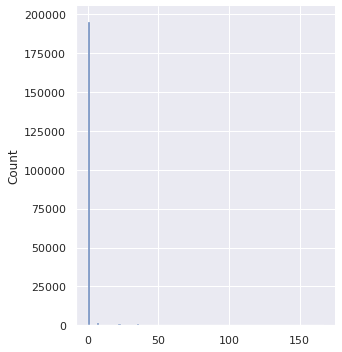

In [19]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
sns.displot(np.square(dist_train),
             bins = 100, 
             kde= False);
#plt.axvline(x=threshold, color = 'red')
#plt.xlim([0.0,150])

Text(0.5, 6.799999999999979, 'Mahalanobis dist')

<Figure size 432x288 with 0 Axes>

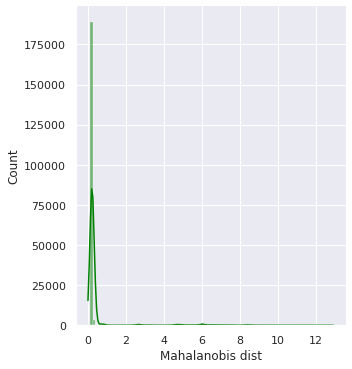

In [20]:
plt.figure()
sns.displot(dist_train,
             bins = 100, 
             kde= True, 
            color = 'green');
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Mahalanobis dist')
#plt.axvline(x=threshold, color = 'red')

Text(0.5, 6.799999999999979, 'Mahalanobis dist')

<Figure size 432x288 with 0 Axes>

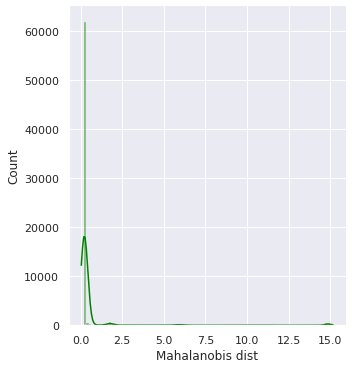

In [21]:
plt.figure()
sns.displot(dist_test,
             bins = 100, 
             kde= True, 
            color = 'green');
#plt.axvline(x=threshold, color = 'red')
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Mahalanobis dist')

In [22]:
# Data loading and pre-processing:
data_dir = '/afs/cern.ch/user/m/mrapelli/private/mnt/stablebeamfills/train'
merged_data = []

for filename in sorted(os.listdir(data_dir), reverse=True):
    if not filename.startswith("bcm1f_fills"): continue
    #if not filename.startswith("bcm1f_fills_7634"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset["name"] = filename
    print (dataset.shape)
    dataset = dataset.set_index('dt')
    dataset = dataset.reset_index()
    dataset['Datetime'] = pd.to_datetime(dataset['dt']).values.astype(int)
    dataset.set_index('Datetime', inplace=True)
    dataset.drop(columns=['dt'], inplace = True)
    merged_data.append(dataset)
    

dataset_train1 = pd.concat(merged_data)#.sort_index()

bcm1f_fills_8078.csv
(5998, 51)
bcm1f_fills_8076.csv
(6137, 51)
bcm1f_fills_8073.csv
(6296, 51)
bcm1f_fills_8072.csv
(6284, 51)
bcm1f_fills_8068.csv
(5060, 51)
bcm1f_fills_8063.csv
(5485, 51)
bcm1f_fills_8062.csv
(6728, 51)
bcm1f_fills_8059.csv
(5526, 51)
bcm1f_fills_8058.csv
(4986, 51)
bcm1f_fills_8057.csv
(5516, 51)
bcm1f_fills_8046.csv
(5659, 51)
bcm1f_fills_8043.csv
(5851, 51)
bcm1f_fills_8033.csv
(5463, 51)
bcm1f_fills_8030.csv
(4928, 51)
bcm1f_fills_8023.csv
(6643, 51)
bcm1f_fills_8022.csv
(5590, 51)
bcm1f_fills_8018.csv
(5825, 51)
bcm1f_fills_7978.csv
(6409, 51)
bcm1f_fills_7967.csv
(5679, 51)
bcm1f_fills_7966.csv
(6401, 51)
bcm1f_fills_7965.csv
(5995, 51)
bcm1f_fills_7923.csv
(44180, 51)
bcm1f_fills_7921.csv
(39653, 51)


In [23]:
# Data loading and pre-processing:
data_dir = '/afs/cern.ch/user/m/mrapelli/private/mnt/stablebeamfills/test'
merged_data = []

for filename in sorted(os.listdir(data_dir), reverse=True):
    if not filename.startswith("bcm1f_fills"): continue
    #if not filename.startswith("bcm1f_fills_7634"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset["name"] = filename
    print (dataset.shape)
    dataset = dataset.set_index('dt')
    dataset = dataset.reset_index()
    dataset['Datetime'] = pd.to_datetime(dataset['dt']).values.astype(int)
    dataset.set_index('Datetime', inplace=True)
    dataset.drop(columns=['dt'], inplace = True)
    merged_data.append(dataset)
    

dataset_test = pd.concat(merged_data)#.sort_index()

bcm1f_fills_8151.csv
(54208, 50)
bcm1f_fills_8067_sampled.csv
(25668, 50)
bcm1f_fills_8067.csv
(6060, 51)
bcm1f_fills_8057.csv
(5516, 51)
bcm1f_fills_8027.csv
(5843, 51)
bcm1f_fills_8020.csv
(5441, 51)
bcm1f_fills_8019.csv
(5907, 51)
bcm1f_fills_8017.csv
(6480, 51)
bcm1f_fills_8016.csv
(5790, 51)
bcm1f_fills_8007.csv
(6478, 51)
bcm1f_fills_7969.csv
(6136, 51)
bcm1f_fills_7963.csv
(5866, 51)
bcm1f_fills_7960.csv
(7155, 51)


In [24]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
#dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
#dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Datetime,,,,,,,,,,,,,,,,,,,,,
1659358807000000000,31.000000,60.000000,37.000000,38.000000,20.000000,19.000000,29.000000,40.000000,46.000000,35.0,...,33.000000,36.000000,30.0,23.000000,4.000000,0.000000,36.000000,43.000000,33.000000,43.000000
1659358808000000000,30.800000,61.733333,36.466667,37.266667,20.733333,19.200000,30.133333,39.933333,45.133333,34.2,...,32.266667,36.066667,30.0,22.733333,3.933333,0.066667,35.866667,42.600000,32.666667,42.133333
1659358809000000000,30.600000,63.466667,35.933333,36.533333,21.466667,19.400000,31.266667,39.866667,44.266667,33.4,...,31.533333,36.133333,30.0,22.466667,3.866667,0.133333,35.733333,42.200000,32.333333,41.266667
1659358810000000000,30.400000,65.200000,35.400000,35.800000,22.200000,19.600000,32.400000,39.800000,43.400000,32.6,...,30.800000,36.200000,30.0,22.200000,3.800000,0.200000,35.600000,41.800000,32.000000,40.400000
1659358811000000000,30.200000,66.933333,34.866667,35.066667,22.933333,19.800000,33.533333,39.733333,42.533333,31.8,...,30.066667,36.266667,30.0,21.933333,3.733333,0.266667,35.466667,41.400000,31.666667,39.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657108852000000000,2.733333,0.266667,0.733333,0.266667,0.000000,1.266667,0.533333,0.733333,0.000000,0.0,...,0.000000,4.333333,0.0,0.733333,0.000000,0.000000,0.000000,0.266667,0.266667,0.266667
1657108853000000000,2.800000,0.200000,0.800000,0.200000,0.000000,1.200000,0.400000,0.800000,0.000000,0.0,...,0.000000,4.000000,0.0,0.800000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000
1657108854000000000,2.866667,0.133333,0.866667,0.133333,0.000000,1.133333,0.266667,0.866667,0.000000,0.0,...,0.000000,3.666667,0.0,0.866667,0.000000,0.000000,0.000000,0.133333,0.133333,0.133333


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,name,mean
Datetime,,,,,,,,,,,,,,,,,,,,,
1659096129000000000,27.000000,51.000000,29.000000,17.000000,27.000000,28.000000,33.000000,33.000000,27.000000,37.000000,...,15.000000,16.000000,7.000000,0.000000,35.000000,27.000000,26.000000,35.000000,bcm1f_fills_8067.csv,28.333333
1659096130000000000,28.066667,50.400000,28.333333,17.666667,26.466667,27.600000,33.533333,34.066667,27.066667,36.533333,...,15.533333,16.066667,6.933333,0.066667,34.933333,26.866667,26.933333,34.333333,bcm1f_fills_8067.csv,28.386111
1659096131000000000,29.133333,49.800000,27.666667,18.333333,25.933333,27.200000,34.066667,35.133333,27.133333,36.066667,...,16.066667,16.133333,6.866667,0.133333,34.866667,26.733333,27.866667,33.666667,bcm1f_fills_8067.csv,28.438889
1659096132000000000,30.200000,49.200000,27.000000,19.000000,25.400000,26.800000,34.600000,36.200000,27.200000,35.600000,...,16.600000,16.200000,6.800000,0.200000,34.800000,26.600000,28.800000,33.000000,bcm1f_fills_8067.csv,28.491667
1659096133000000000,31.266667,48.600000,26.333333,19.666667,24.866667,26.400000,35.133333,37.266667,27.266667,35.133333,...,17.133333,16.266667,6.733333,0.266667,34.733333,26.466667,29.733333,32.333333,bcm1f_fills_8067.csv,28.544444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657454477000000000,53029.218274,55295.317259,52671.172589,56977.550761,55620.926396,63234.392132,59946.959391,67007.935279,57165.003807,68119.469543,...,53122.043147,59086.218274,12072.524112,3458.925127,51794.300761,56945.459391,54913.686548,57261.780457,bcm1f_fills_7960.csv,54426.362786
1657454478000000000,53108.233503,55377.664975,52749.649746,57062.426396,55703.781726,63328.593909,60036.258883,67107.756345,57250.131980,68220.944162,...,53201.162437,59174.233503,12090.502538,3464.071066,51871.426396,57030.258883,54995.467005,57347.055838,bcm1f_fills_7960.csv,54507.430732
1657454479000000000,53187.248731,55460.012690,52828.126904,57147.302030,55786.637056,63422.795685,60125.558376,67207.577411,57335.260152,68322.418782,...,53280.281726,59262.248731,12108.480964,3469.217005,51948.552030,57115.058376,55077.247462,57432.331218,bcm1f_fills_7960.csv,54588.498678


In [25]:

anomaly_train = pd.DataFrame(X_train)
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly_train['name'] = dataset_train1['name']
anomaly = pd.DataFrame(testX)
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly['name'] = dataset_test['name']
anomaly.head()


,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,Mob dist,Thresh,Anomaly,name
Datetime,,,,,,,,,,,,,,,,,,,,,
1659096129000000000,0.000016,0.000034,0.000017,0.000009,0.000015,0.000014,0.000017,0.000016,0.000015,0.000018,...,0.000019,0.000000e+00,0.000022,0.000015,0.000015,0.000019,0.230339,0.777528,False,bcm1f_fills_8067.csv
1659096130000000000,0.000017,0.000034,0.000017,0.000010,0.000015,0.000013,0.000018,0.000016,0.000015,0.000018,...,0.000019,6.781132e-07,0.000022,0.000015,0.000016,0.000019,0.230337,0.777528,False,bcm1f_fills_8067.csv
1659096131000000000,0.000017,0.000034,0.000016,0.000010,0.000015,0.000013,0.000018,0.000017,0.000015,0.000018,...,0.000019,1.356226e-06,0.000022,0.000015,0.000016,0.000019,0.230335,0.777528,False,bcm1f_fills_8067.csv
1659096132000000000,0.000018,0.000033,0.000016,0.000011,0.000014,0.000013,0.000018,0.000017,0.000015,0.000018,...,0.000019,2.034340e-06,0.000022,0.000015,0.000017,0.000018,0.230333,0.777528,False,bcm1f_fills_8067.csv
1659096133000000000,0.000019,0.000033,0.000016,0.000011,0.000014,0.000013,0.000019,0.000018,0.000015,0.000018,...,0.000018,2.712453e-06,0.000022,0.000014,0.000017,0.000018,0.230331,0.777528,False,bcm1f_fills_8067.csv


In [26]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
#anomaly_alldata.to_csv('Anomaly_distance_Mahalanobis.csv')


#anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

In [27]:
anomaly_train

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,Mob dist,Thresh,Anomaly,name
Datetime,,,,,,,,,,,,,,,,,,,,,
1659358807000000000,0.000019,4.044299e-05,2.193105e-05,2.107117e-05,0.000011,9.288596e-06,1.535479e-05,1.913838e-05,0.000026,0.000017,...,0.000011,0.000000e+00,0.000023,2.352926e-05,1.907070e-05,2.380606e-05,0.230358,0.777528,False,bcm1f_fills_8078.csv
1659358808000000000,0.000018,4.161134e-05,2.161492e-05,2.066453e-05,0.000012,9.386371e-06,1.595487e-05,1.910648e-05,0.000025,0.000017,...,0.000011,6.781132e-07,0.000023,2.331038e-05,1.887807e-05,2.332625e-05,0.230354,0.777528,False,bcm1f_fills_8078.csv
1659358809000000000,0.000018,4.277969e-05,2.129880e-05,2.025790e-05,0.000012,9.484146e-06,1.655494e-05,1.907459e-05,0.000025,0.000017,...,0.000011,1.356226e-06,0.000023,2.309151e-05,1.868544e-05,2.284643e-05,0.230350,0.777528,False,bcm1f_fills_8078.csv
1659358810000000000,0.000018,4.394804e-05,2.098268e-05,1.985126e-05,0.000012,9.581920e-06,1.715501e-05,1.904269e-05,0.000024,0.000016,...,0.000010,2.034340e-06,0.000023,2.287263e-05,1.849280e-05,2.236662e-05,0.230346,0.777528,False,bcm1f_fills_8078.csv
1659358811000000000,0.000018,4.511640e-05,2.066655e-05,1.944462e-05,0.000013,9.679695e-06,1.775508e-05,1.901079e-05,0.000024,0.000016,...,0.000010,2.712453e-06,0.000022,2.265375e-05,1.830017e-05,2.188681e-05,0.230342,0.777528,False,bcm1f_fills_8078.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657108852000000000,0.000002,1.797466e-07,4.346694e-07,1.478679e-07,0.000000,6.192397e-07,2.823870e-07,3.508703e-07,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,1.459179e-07,1.541067e-07,1.476345e-07,0.230434,0.777528,False,bcm1f_fills_7921.csv
1657108853000000000,0.000002,1.348100e-07,4.741848e-07,1.109009e-07,0.000000,5.866482e-07,2.117903e-07,3.827676e-07,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,1.094384e-07,1.155800e-07,1.107258e-07,0.230434,0.777528,False,bcm1f_fills_7921.csv
1657108854000000000,0.000002,8.987330e-08,5.137002e-07,7.393393e-08,0.000000,5.540566e-07,1.411935e-07,4.146649e-07,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,7.295895e-08,7.705334e-08,7.381723e-08,0.230434,0.777528,False,bcm1f_fills_7921.csv


In [28]:
anomaly_train = anomaly_train.reset_index()
anomaly_train['dt'] = pd.to_datetime(anomaly_train['Datetime'])
anomaly_train.set_index('dt', inplace=True)
anomaly_train.drop(columns=['Datetime', 'Datetime'], inplace = True)


In [29]:
#anomaly_train.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])
#plt.xlabel('Time')

In [30]:
anomaly = anomaly.reset_index()
anomaly['dt'] = pd.to_datetime(anomaly['Datetime'])
anomaly.set_index('dt', inplace=True)
anomaly.drop(columns=['Datetime'], inplace = True)

In [31]:
#anomaly.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])
#plt.xlabel('Time')

In [32]:
anomaly

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,Mob dist,Thresh,Anomaly,name
dt,,,,,,,,,,,,,,,,,,,,,
2022-07-29 12:02:09,0.000016,0.000034,0.000017,0.000009,0.000015,0.000014,0.000017,0.000016,0.000015,0.000018,...,0.000019,0.000000e+00,0.000022,0.000015,0.000015,0.000019,0.230339,0.777528,False,bcm1f_fills_8067.csv
2022-07-29 12:02:10,0.000017,0.000034,0.000017,0.000010,0.000015,0.000013,0.000018,0.000016,0.000015,0.000018,...,0.000019,6.781132e-07,0.000022,0.000015,0.000016,0.000019,0.230337,0.777528,False,bcm1f_fills_8067.csv
2022-07-29 12:02:11,0.000017,0.000034,0.000016,0.000010,0.000015,0.000013,0.000018,0.000017,0.000015,0.000018,...,0.000019,1.356226e-06,0.000022,0.000015,0.000016,0.000019,0.230335,0.777528,False,bcm1f_fills_8067.csv
2022-07-29 12:02:12,0.000018,0.000033,0.000016,0.000011,0.000014,0.000013,0.000018,0.000017,0.000015,0.000018,...,0.000019,2.034340e-06,0.000022,0.000015,0.000017,0.000018,0.230333,0.777528,False,bcm1f_fills_8067.csv
2022-07-29 12:02:13,0.000019,0.000033,0.000016,0.000011,0.000014,0.000013,0.000019,0.000018,0.000015,0.000018,...,0.000018,2.712453e-06,0.000022,0.000014,0.000017,0.000018,0.230331,0.777528,False,bcm1f_fills_8067.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10 12:01:17,0.031807,0.037272,0.031220,0.031594,0.031133,0.030914,0.031740,0.032061,0.031706,0.033980,...,0.033087,3.518314e-02,0.032818,0.031160,0.031735,0.031702,0.490506,0.777528,False,bcm1f_fills_7960.csv
2022-07-10 12:01:18,0.031854,0.037327,0.031266,0.031641,0.031179,0.030960,0.031788,0.032108,0.031753,0.034031,...,0.033136,3.523549e-02,0.032867,0.031207,0.031782,0.031749,0.491270,0.777528,False,bcm1f_fills_7960.csv
2022-07-10 12:01:19,0.031902,0.037383,0.031313,0.031688,0.031226,0.031006,0.031835,0.032156,0.031800,0.034081,...,0.033185,3.528783e-02,0.032916,0.031253,0.031829,0.031796,0.492034,0.777528,False,bcm1f_fills_7960.csv


In [33]:
anomaly = anomaly.reset_index()
anomaly['Datetime'] = pd.to_datetime(anomaly['dt']).values.astype(int)


anomaly.set_index('Datetime', inplace=True)
anomaly.drop(columns=['dt'], inplace = True)


In [34]:
anomalies = anomaly.loc[anomaly['Anomaly'] == True]

In [35]:
name = anomalies['name'].unique()
name


array(['bcm1f_fills_8067.csv', 'bcm1f_fills_8020.csv',
       'bcm1f_fills_8017.csv'], dtype=object)